In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
data=pd.read_csv("cars.txt")
data

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front      88.60  ...   
1          two  convertible        rwd          front      88.60  ...   
2          two    hatchback        rwd          front      94.50  ...   
3         four        sedan        fwd          front      99.80  ...   
4         four        sedan        4wd          front      99.40  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front     109.10  ...   
201       four        sedan        rwd          front     109.10  ...   
202       four        sedan        rwd          front     109.10  ...   
203       four        sedan        rwd          front     109.10  ...   
204       four        sedan        rwd          front     109.10  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68             9.00        111   
1           130        mpfi       3.47    2.68             9.00        111   
2           152        mpfi       2.68    3.47             9.00        154   
3           109        mpfi       3.19    3.40            10.00        102   
4           136        mpfi       3.19    3.40             8.00        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15             9.50        114   
201         141        mpfi       3.78    3.15             8.70        160   
202         173        mpfi       3.58    2.87             8.80        134   
203         145         idi       3.01    3.40            23.00        106   
204         141        mpfi       3.78    3.15             9.50        114   

     peakrpm citympg  highwaympg     price  
0       5000      21          27 13,495.00  
1       5000      21          27 16,500.00  
2       5000      19          26 16,500.00  
3       5500      24          30 13,950.00  
4       5500      18          22 17,450.00  
..       ...     ...         ...       ...  
200     5400      23          28 16,845.00  
201     5300      19          25 19,045.00  
202     5500      18          23 21,485.00  
203     4800      26          27 22,470.00  
204     5400      19          25 22,625.00  

[205 rows x 26 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## EDA, cleaning and visualization

In [5]:
data=data.drop(["car_ID", "CarName"],axis=1)

In [6]:
data.select_dtypes('object')

fueltype aspiration doornumber      carbody drivewheel enginelocation  \
0        gas        std        two  convertible        rwd          front   
1        gas        std        two  convertible        rwd          front   
2        gas        std        two    hatchback        rwd          front   
3        gas        std       four        sedan        fwd          front   
4        gas        std       four        sedan        4wd          front   
..       ...        ...        ...          ...        ...            ...   
200      gas        std       four        sedan        rwd          front   
201      gas      turbo       four        sedan        rwd          front   
202      gas        std       four        sedan        rwd          front   
203   diesel      turbo       four        sedan        rwd          front   
204      gas      turbo       four        sedan        rwd          front   

    enginetype cylindernumber fuelsystem  
0         dohc           four       mpfi  
1         dohc           four       mpfi  
2         ohcv            six       mpfi  
3          ohc           four       mpfi  
4          ohc           five       mpfi  
..         ...            ...        ...  
200        ohc           four       mpfi  
201        ohc           four       mpfi  
202       ohcv            six       mpfi  
203        ohc            six        idi  
204        ohc           four       mpfi  

[205 rows x 9 columns]

In [7]:
for col in data.select_dtypes('object').columns:
    print(f"{col}: {Counter(data[col])}")

fueltype: Counter({'gas': 185, 'diesel': 20})
aspiration: Counter({'std': 168, 'turbo': 37})
doornumber: Counter({'four': 115, 'two': 90})
carbody: Counter({'sedan': 96, 'hatchback': 70, 'wagon': 25, 'hardtop': 8, 'convertible': 6})
drivewheel: Counter({'fwd': 120, 'rwd': 76, '4wd': 9})
enginelocation: Counter({'front': 202, 'rear': 3})
enginetype: Counter({'ohc': 148, 'ohcf': 15, 'ohcv': 13, 'dohc': 12, 'l': 12, 'rotor': 4, 'dohcv': 1})
cylindernumber: Counter({'four': 159, 'six': 24, 'five': 11, 'eight': 5, 'two': 4, 'three': 1, 'twelve': 1})
fuelsystem: Counter({'mpfi': 94, '2bbl': 66, 'idi': 20, '1bbl': 11, 'spdi': 9, '4bbl': 3, 'mfi': 1, 'spfi': 1})


<Axes: xlabel='fueltype', ylabel='count'>

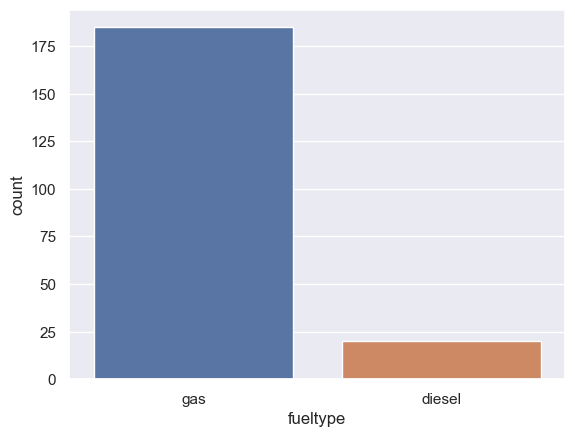

In [8]:
sns.countplot(x=data.fueltype)

<Axes: xlabel='carbody', ylabel='count'>

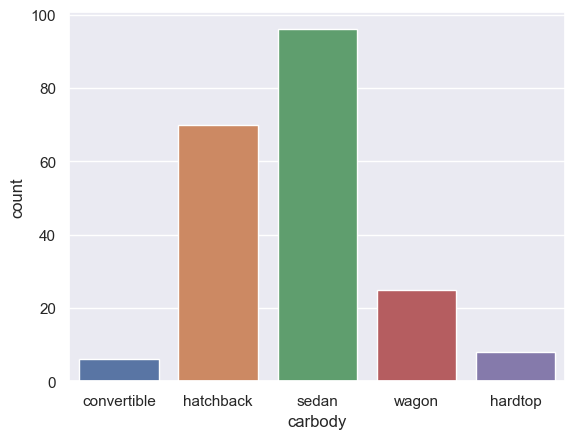

In [9]:
sns.countplot(x=data.carbody)

<Axes: xlabel='enginetype', ylabel='count'>

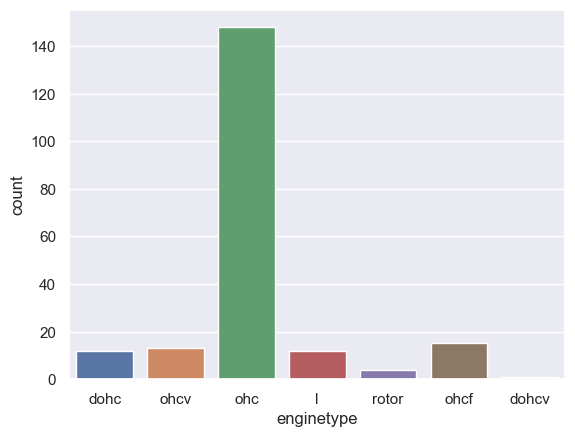

In [10]:
sns.countplot(x=data.enginetype)

<Axes: xlabel='cylindernumber', ylabel='count'>

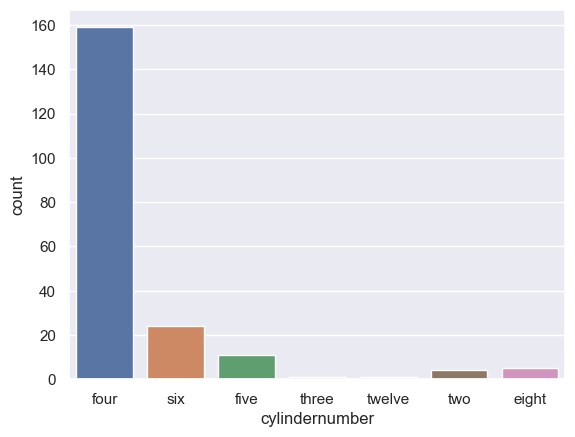

In [11]:
sns.countplot(x=data.cylindernumber)

In [12]:
data.corr()['price'].sort_values()

highwaympg         -0.70
citympg            -0.69
peakrpm            -0.09
symboling          -0.08
compressionratio    0.07
stroke              0.08
carheight           0.12
boreratio           0.55
wheelbase           0.58
carlength           0.68
carwidth            0.76
horsepower          0.81
curbweight          0.84
enginesize          0.87
price               1.00
Name: price, dtype: float64

<Axes: >

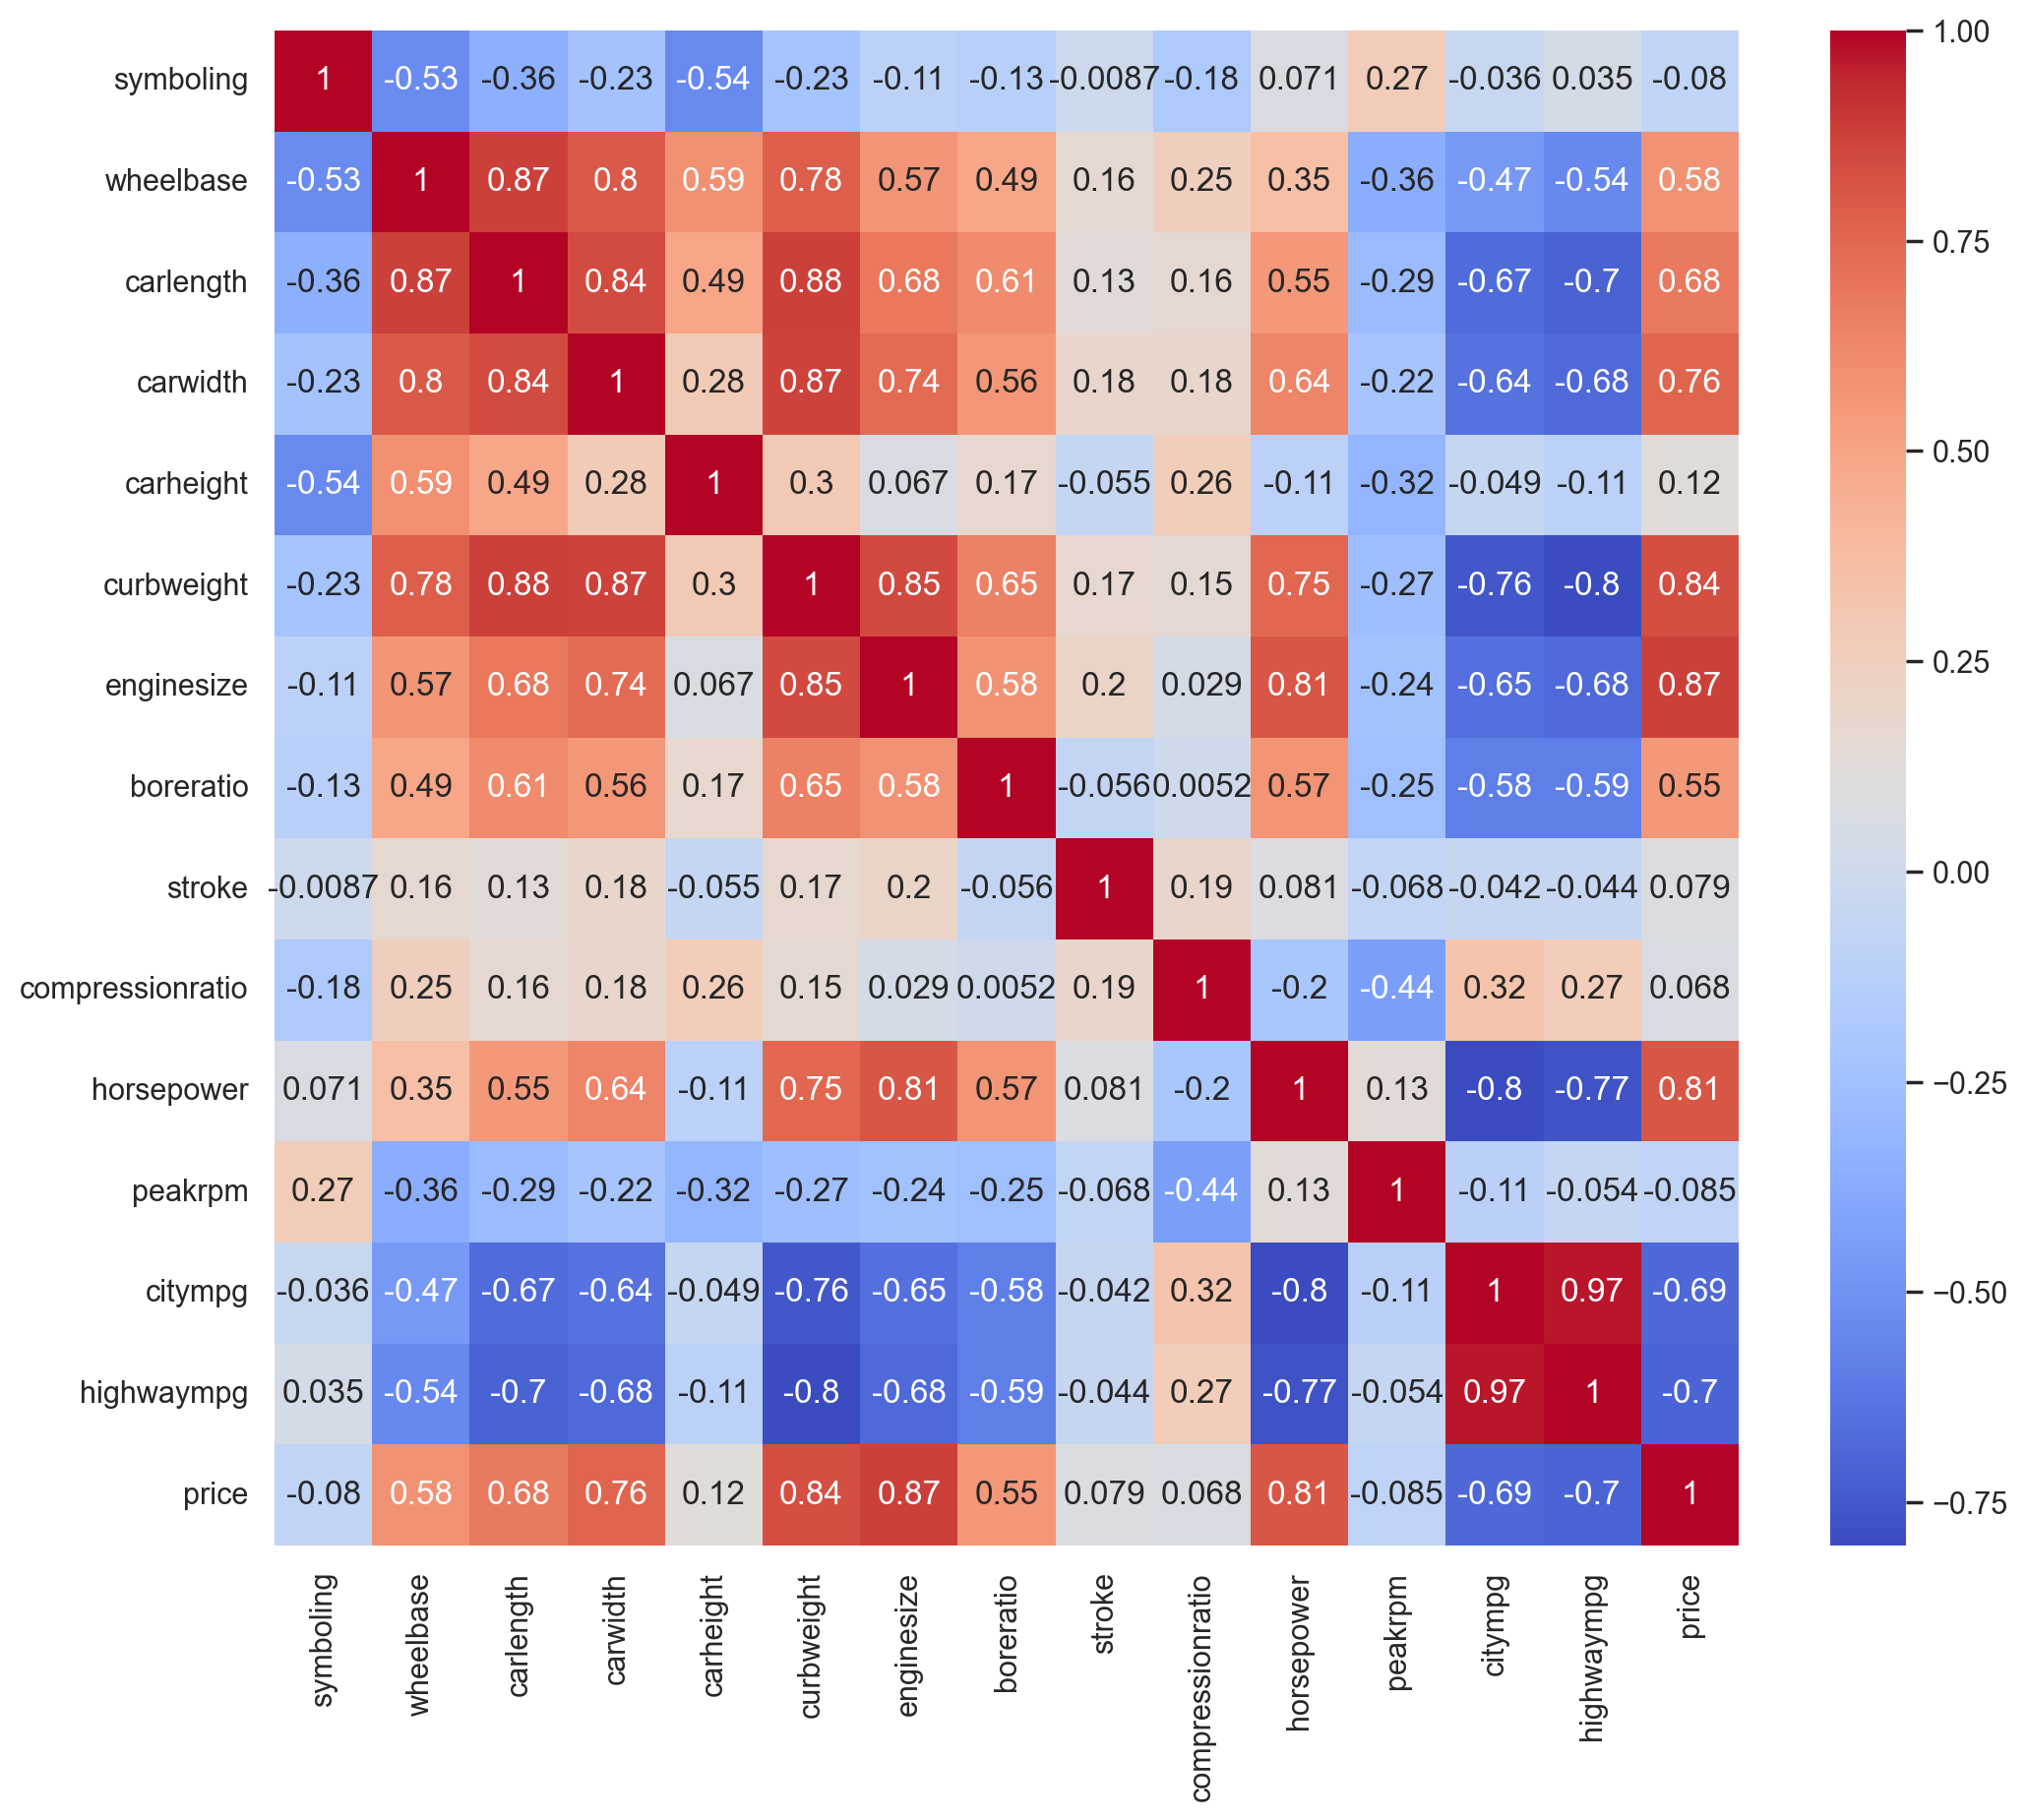

In [13]:
plt.figure(figsize=(12,10), dpi=200)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

<Figure size 2000x1200 with 0 Axes>

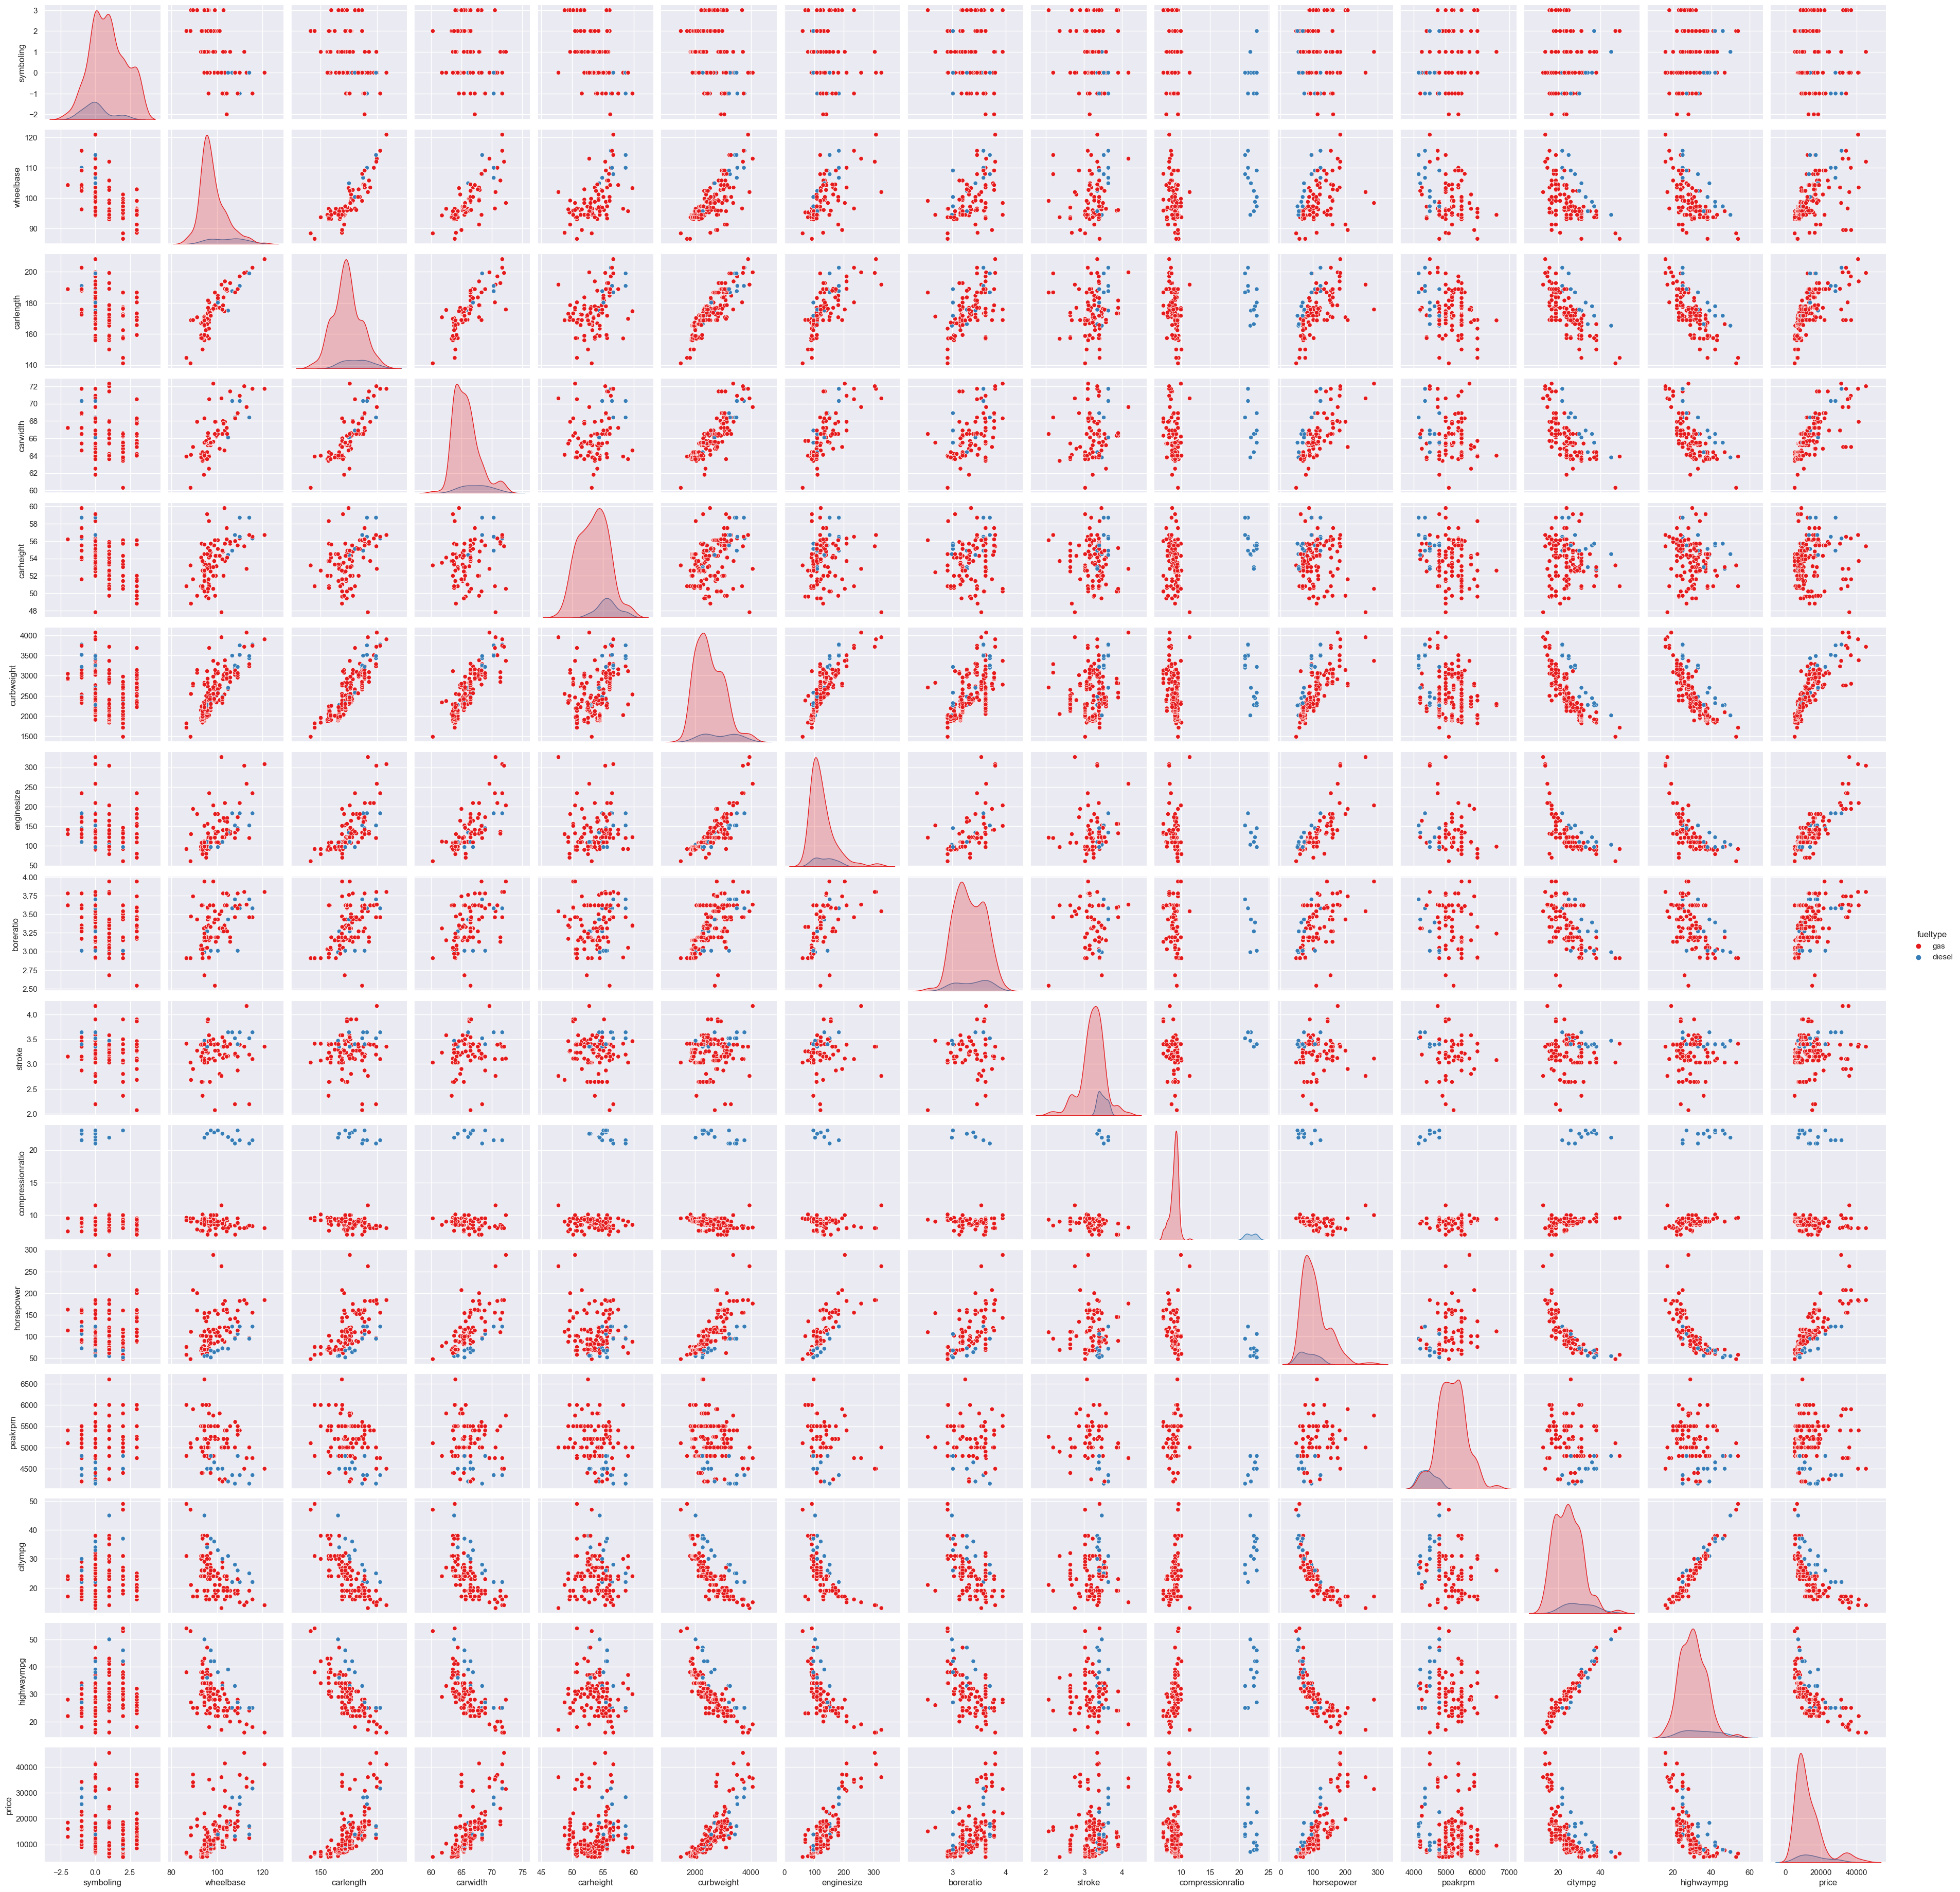

In [88]:
plt.figure(figsize=(10,6), dpi=200)
sns.pairplot(data=data, hue='fueltype', palette='Set1')

<Axes: xlabel='enginesize', ylabel='Count'>

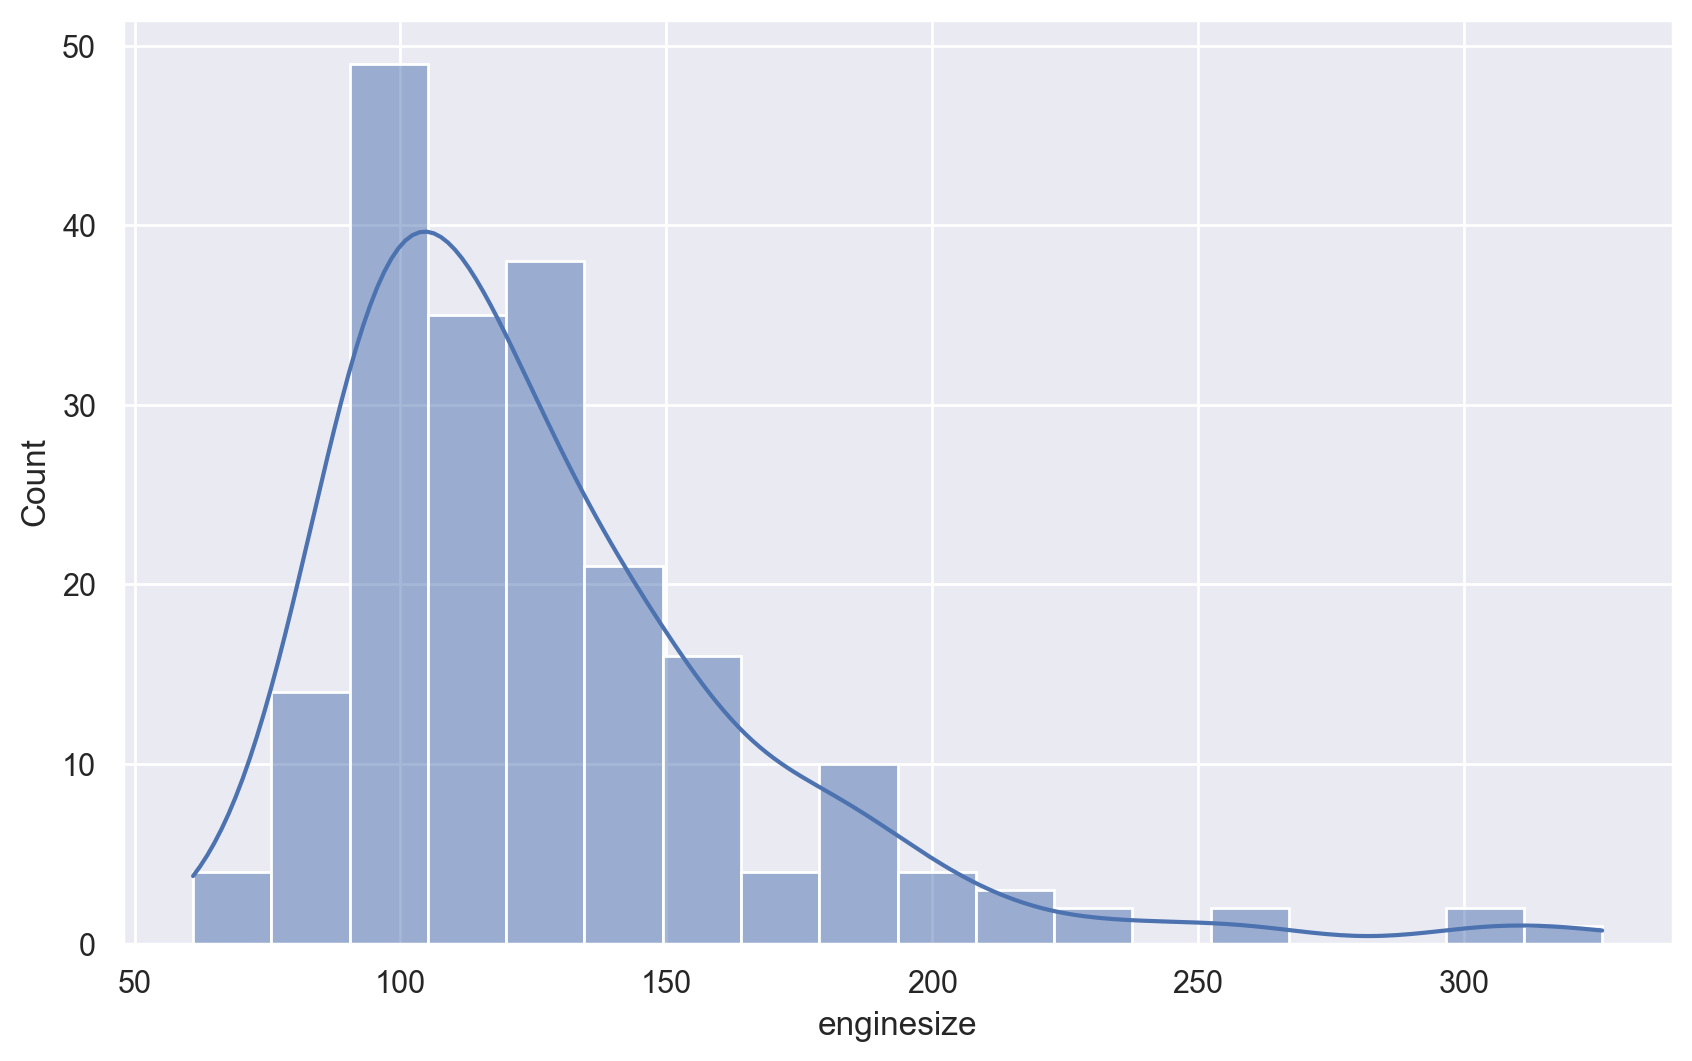

In [14]:
plt.figure(figsize=(10,6), dpi=200)
sns.histplot(data.enginesize, kde=True)

In [15]:
from sklearn.neighbors import LocalOutlierFactor

In [16]:
data=pd.get_dummies(data, drop_first=True)

In [17]:
X=data.drop('price', axis=1)

In [18]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

In [19]:
lof=LocalOutlierFactor(n_neighbors=20)
outlier_labels = lof.fit_predict(scaled_X)
len(outlier_labels[outlier_labels==-1])

22

In [20]:
data=data[outlier_labels!=-1]

In [21]:
data.shape

(183, 44)

## Predictive modelling

In [22]:
import xgboost as xgb
from sklearn.linear_model import ElasticNetCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

In [23]:
X=data.drop('price', axis=1)
y=data.price

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [26]:
def performace_table(bayes_model, x_train, y_train,x_test, y_test):
    train_pred=bayes_model.predict(x_train)
    train_error=round(mean_absolute_error(y_train, train_pred)/y_train.mean()*100,2)
    train_R2=round(r2_score(y_train, train_pred)*100,2)
    
    test_pred=bayes_model.predict(x_test)
    test_error=round(mean_absolute_error(y_test, test_pred)/y_test.mean()*100,2)
    test_R2=round(r2_score(y_test, test_pred)*100,2)
    
    performace_table=pd.DataFrame()
    performace_table["Performance indicators"]=["Error percentage", "R-squared"]
    performace_table["On Training dataset"]=[train_error, train_R2]
    performace_table["On Test dataset"]=[test_error, test_R2]
    return performace_table

### XGBoost

In [27]:
xgb_model=xgb.XGBRegressor()
xgb_params={'n_estimators': Integer(50,300),
            'learning_rate': Real(0.01,0.2),
            'max_depth': Integer(3,5),
            'subsample':Real(0.5,1),
            'colsample_bytree': Real(0.5,1),
            'gamma': Real(0.1,4),
            'reg_alpha': Real(0.01,1),
            'reg_lambda': Real(1,3),
            'min_child_weight': Integer(2,5)
            }

In [40]:
xgb_bayes=BayesSearchCV(xgb_model, search_spaces=xgb_params, cv=5, n_iter=30)
xgb_bayes.fit(x_train, y_train)

BayesSearchCV(cv=5,
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                             'min_child_weight': Integer(low=2, high=5, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=50, high=300, prior='uniform', transform='normalize'),
                             'reg_alpha': Real(low=0.01, high=1, prior='uniform', transform='normalize'),
                             'reg_lambda': Real(low=1, high=3, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.5, high=1, prior='uniform', transform='normalize')})

In [41]:
performace_table(xgb_bayes, x_train, y_train,x_test, y_test)

Performance indicators  On Training dataset  On Test dataset
0       Error percentage                 5.10             9.32
1              R-squared                98.49            93.88

<Axes: xlabel='price'>

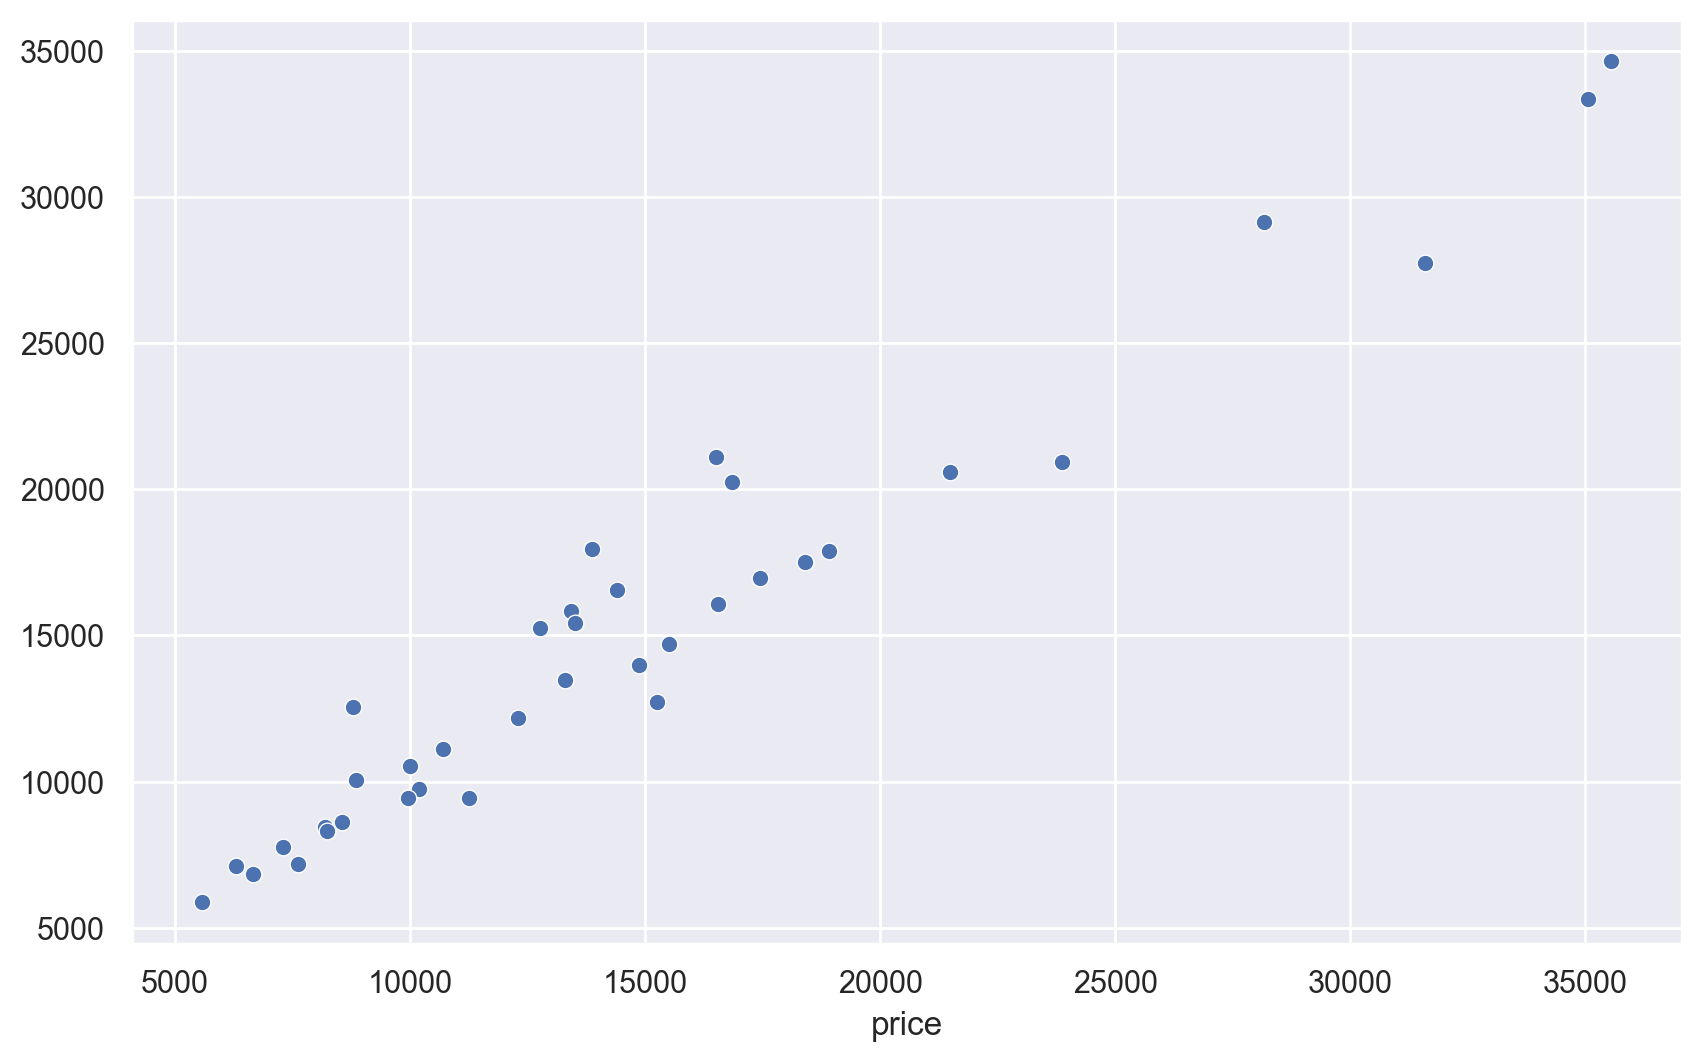

In [42]:
pred=xgb_bayes.predict(x_test)
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(x=y_test, y=pred)

### Elastic Linear Regression

In [32]:
elastic_model=ElasticNetCV()
elastic_params={"l1_ratio": Real(0.1,1)}

In [33]:
elastic_bayes=BayesSearchCV(elastic_model, search_spaces=elastic_params, cv=5, n_iter=30)
elastic_bayes.fit(x_train, y_train)

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective h

BayesSearchCV(cv=5, estimator=ElasticNetCV(), n_iter=30,
              search_spaces={'l1_ratio': Real(low=0.1, high=1, prior='uniform', transform='normalize')})

In [35]:
performace_table(elastic_bayes, x_train, y_train,x_test, y_test)

Performance indicators  On Training dataset  On Test dataset
0       Error percentage                11.60            13.95
1              R-squared                92.55            87.99

In [48]:
feat=np.abs(pd.DataFrame(xgb_bayes.best_estimator_.feature_importances_, columns=["Importance"])).sort_values(by='Importance', ascending=False)
feat['Features']=X.columns
feat.head(15)

Importance          Features
5         0.21         symboling
6         0.18         wheelbase
22        0.12         carlength
10        0.06          carwidth
13        0.06         carheight
3         0.06        curbweight
41        0.04        enginesize
2         0.04         boreratio
1         0.02            stroke
36        0.02  compressionratio
21        0.02        horsepower
26        0.02           peakrpm
20        0.02           citympg
28        0.02        highwaympg
7         0.01      fueltype_gas

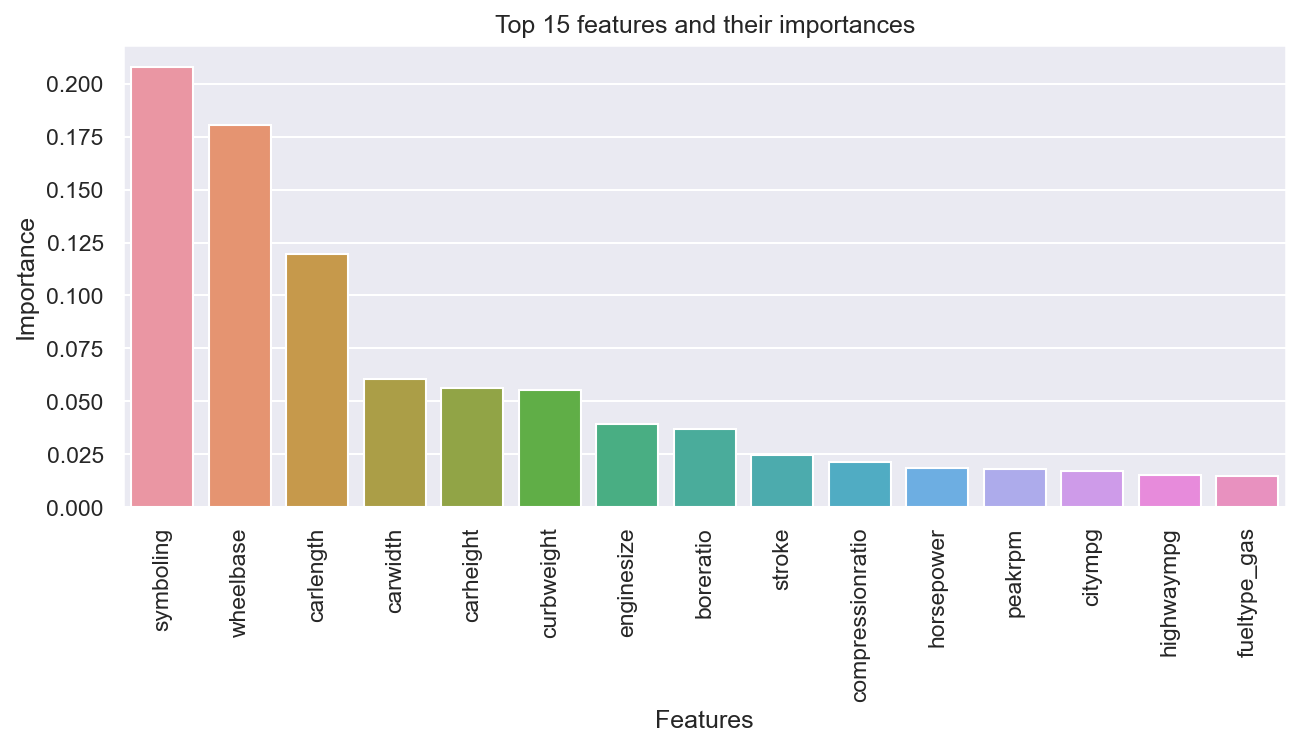

In [44]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(data=feat.head(15), x="Features", y="Importance")
plt.xticks(rotation=90);
plt.title("Top 15 features and their importances");

#### In conclusion, this data science project successfully addressed the objective of building an accurate car price prediction model for a car dealership. By leveraging machine learning algorithms and utilizing a comprehensive dataset comprising various car features and historical pricing information, I was able to develop a robust model capable of predicting car prices with high precision. My findings indicate that the incorporation of advanced regression techniques, such as extreme gradient boosting and Elastic Net regularized regression, yielded superior predictive performance compared to traditional linear regression models. The developed model demonstrated high accuracy in estimating car prices across different makes, models, and conditions. Additionally, feature importance analysis revealed that factors such as symboling, wheelbase, car length, and car width played crucial roles in determining the market value of cars.